In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("new_train.csv",index_col = 'Date', parse_dates = True)

In [3]:
train.head()

,Open-Stock-1,High-Stock-1,Low-Stock-1,Close-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1,Open-Stock-2,High-Stock-2,Low-Stock-2,...,VWAP-Stock-4,Volume-Stock-4,Turnover-Stock-4,Open-Stock-5,High-Stock-5,Low-Stock-5,Close-Stock-5,VWAP-Stock-5,Volume-Stock-5,Turnover-Stock-5
Date,,,,,,,,,,,,,,,,,,,,,
2010-06-01,1889.7,1890.00,1838.00,1855.10,1855.75,568273,105457457545000,285.40,285.95,281.50,...,844.44,3878011,327474904340000,1235.0,1238.00,1177.0,1181.70,1197.29,1786082,213845404410000
2010-06-02,1848.0,1862.75,1828.00,1853.05,1842.82,945167,174177161135000,284.00,284.80,279.25,...,838.31,3320996,278403743240000,1195.0,1206.95,1168.5,1201.15,1189.87,1307410,155564994855000
2010-06-03,1864.1,1910.00,1864.10,1905.60,1893.91,679689,128727119355000,283.00,286.85,282.50,...,853.51,2494522,212910342645000,1211.0,1248.00,1211.0,1242.30,1231.63,1482919,182640434320000
2010-06-04,1906.0,1909.80,1880.10,1885.70,1889.21,509435,96242800140000,288.85,291.80,277.00,...,862.85,2963920,255740999120000,1240.0,1258.00,1240.0,1245.45,1249.72,1454459,181767075850000
2010-06-07,1867.0,1894.85,1808.35,1876.65,1873.32,961913,180196832650000,285.00,289.10,285.00,...,839.89,3471483,291567400640000,1218.6,1225.00,1196.0,1214.80,1209.27,1424594,172272511430000


In [4]:
train.isna().sum()

Open-Stock-1        0
High-Stock-1        0
Low-Stock-1         0
Close-Stock-1       0
VWAP-Stock-1        0
Volume-Stock-1      0
Turnover-Stock-1    0
Open-Stock-2        0
High-Stock-2        0
Low-Stock-2         0
Close-Stock-2       0
VWAP-Stock-2        0
Volume-Stock-2      0
Turnover-Stock-2    0
Open-Stock-3        0
High-Stock-3        0
Low-Stock-3         0
Close-Stock-3       0
VWAP-Stock-3        0
Volume-Stock-3      0
Turnover-Stock-3    0
Open-Stock-4        0
High-Stock-4        0
Low-Stock-4         0
Close-Stock-4       0
VWAP-Stock-4        0
Volume-Stock-4      0
Turnover-Stock-4    0
Open-Stock-5        0
High-Stock-5        0
Low-Stock-5         0
Close-Stock-5       0
VWAP-Stock-5        0
Volume-Stock-5      0
Turnover-Stock-5    0
dtype: int64

In [5]:
train['diff_5'] = train['Close-Stock-5'] - train['Open-Stock-5']

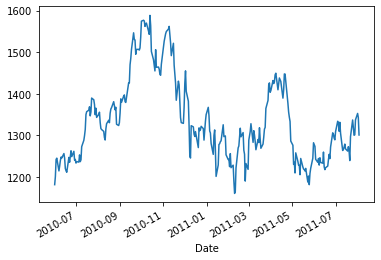

In [6]:
train['Close-Stock-5'].plot()

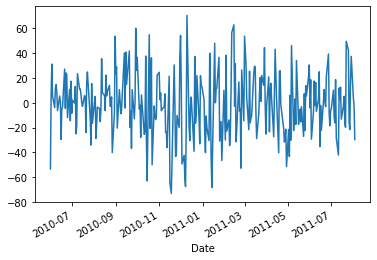

In [7]:
train['diff_5'].plot()

In [8]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(train['Close-Stock-5'])

1. ADF :  -2.605092021102999
2. P-Value :  0.09194941059952189
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression: 297
5. Critical Values :
	 1% :  -3.4525611751768914
	 5% :  -2.87132117782556
	 10% :  -2.5719816428028888


In [9]:
ad_test(train['diff_5'])

1. ADF :  -15.518335773666402
2. P-Value :  2.300776287451676e-28
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 298
5. Critical Values :
	 1% :  -3.4524859843440754
	 5% :  -2.871288184343229
	 10% :  -2.571964047565425


In [10]:
#P value not less than 0.05 hence the dataset is not stationary 

In [11]:
train['Close-Stock-5'] = train['Close-Stock-5'].diff()

In [12]:
train['Close-Stock-5']

Date
2010-06-01      NaN
2010-06-02    19.45
2010-06-03    41.15
2010-06-04     3.15
2010-06-07   -30.65
              ...  
2011-07-28     1.00
2011-07-29    36.00
2011-08-01    15.50
2011-08-02   -10.20
2011-08-03   -41.65
Name: Close-Stock-5, Length: 299, dtype: float64

In [13]:
train = train.dropna()

In [14]:
train['Close-Stock-5']

Date
2010-06-02    19.45
2010-06-03    41.15
2010-06-04     3.15
2010-06-07   -30.65
2010-06-08    11.40
              ...  
2011-07-28     1.00
2011-07-29    36.00
2011-08-01    15.50
2011-08-02   -10.20
2011-08-03   -41.65
Name: Close-Stock-5, Length: 298, dtype: float64

In [15]:
ad_test(train['Close-Stock-5'])

1. ADF :  -11.130623492849638
2. P-Value :  3.2891814652909663e-20
3. Num Of Lags :  2
4. Num Of Observations Used For ADF Regression: 295
5. Critical Values :
	 1% :  -3.452713099849546
	 5% :  -2.871387839457783
	 10% :  -2.5720171933352485


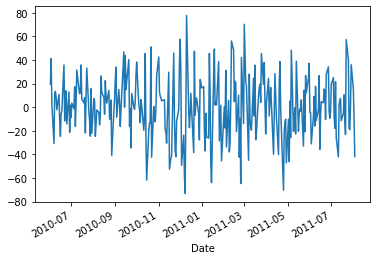

In [16]:
train['Close-Stock-5'].plot()

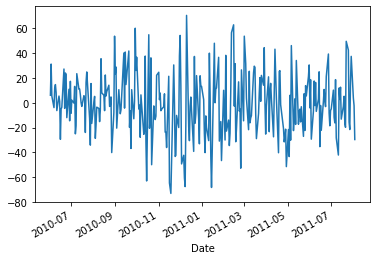

In [17]:
train['diff_5'].plot()

In [18]:
from pmdarima import auto_arima

In [19]:
#Auto arima is going to try diff values for the orders like (0,0,0), (0,0,1) and so on and return the best set of values for orders
stepwise_fit = auto_arima(train['Close-Stock-5'] , trace  = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2778.781, Time=1.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2783.740, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2783.954, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2783.872, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2781.813, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2784.776, Time=0.26 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2785.141, Time=0.24 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=2784.950, Time=0.35 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=2780.696, Time=0.79 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2785.867, Time=0.30 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=2781.466, Time=0.66 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2783.070, Time=0.34 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=2780.906, Time=0.43 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2776.845, Time=0.17 sec
 ARIMA(1,0,2)(0,0,0)[0]          

In [20]:
stepwise_fit = auto_arima(train['diff_5'] , trace  = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2782.338, Time=0.60 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2779.407, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2777.726, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2777.307, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2778.016, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2778.940, Time=0.19 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2778.772, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2780.382, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2775.806, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2777.463, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2777.319, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2776.220, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2778.999, Time=0.10 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 1.640 seconds


In [21]:
#Goal is to minimise AIC

In [22]:
from statsmodels.tsa.arima_model import ARIMA

In [23]:
train.shape

(298, 36)

In [24]:
train_model = train.iloc[:-30]
test_model = train.iloc[-30:]
print(train_model.shape, test_model.shape)

(268, 36) (30, 36)


In [25]:
model = ARIMA(train_model['Close-Stock-5'], order = (2,0,2))
model = model.fit()
model.summary()

C:\Users\prana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          Close-Stock-5   No. Observations:                  268
Model:                     ARMA(2, 2)   Log Likelihood               -1246.499
Method:                       css-mle   S.D. of innovations             25.322
Date:                Sun, 10 Jan 2021   AIC                           2504.997
Time:                        21:14:29   BIC                           2526.543
Sample:                             0   HQIC                          2513.651
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2772      1.693      0.164      0.870      -3.040       3.595
ar.L1.Close-Stock-5    -1.1846      0.120     -9.838      0.000      -1.421      -0.949
ar.L2.Close-Stock-5    -0.6636      0.133     -5.005      0.000      -0.923      -0.404
ma.L1.Close-Stock-5     1.2921      0.090     14.297      0.000       1.115       1.469
ma.L2.Close-Stock-5     0.8253      0.104      7.933      0.000       0.621       1.029
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8926           -0.8427j            1.2276           -0.3796
AR.2           -0.8926           +0.8427j            1.2276            0.3796
MA.1           -0.7828           -0.7739j            1.1008           -0.3759
MA.2           -0.7828           +0.7739j            1.1008            0.3759
-----------------------------------------------------------------------------
"""

In [26]:
model_1 = ARIMA(train_model['diff_5'], order = (0,0,1))
model_1 = model_1.fit()
model_1.summary()

C:\Users\prana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 diff_5   No. Observations:                  268
Model:                     ARMA(0, 1)   Log Likelihood               -1250.008
Method:                       css-mle   S.D. of innovations             25.668
Date:                Sun, 10 Jan 2021   AIC                           2506.016
Time:                        21:14:29   BIC                           2516.789
Sample:                             0   HQIC                          2510.343
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.3292      1.742     -0.763      0.445      -4.743       2.085
ma.L1.diff_5     0.1113      0.061      1.819      0.069      -0.009       0.231
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -8.9845           +0.0000j            8.9845            0.5000
-----------------------------------------------------------------------------
"""

In [27]:
start=len(train_model)
end=len(train_model)+len(test_model)-1
pred=model.predict(start=start,end=end,typ='levels')
pred.index = train.index[start:end+1]
print(pred)

Date
2011-06-23    7.603539
2011-06-24   -8.994523
2011-06-27    6.399442
2011-06-28   -0.822988
2011-06-29   -2.481869
2011-06-30    4.275828
2011-07-01   -2.628821
2011-07-04    1.066536
2011-07-05    1.270537
2011-07-06   -1.423226
2011-07-07    1.632539
2011-07-08   -0.199957
2011-07-11   -0.056802
2011-07-12    0.989585
2011-07-13   -0.344996
2011-07-14    0.541656
2011-07-15    0.376871
2011-07-18   -0.016267
2011-07-19    0.558804
2011-07-20    0.138425
2011-07-21    0.254827
2011-07-22    0.395880
2011-07-25    0.151544
2011-07-26    0.347396
2011-07-27    0.277514
2011-07-28    0.230339
2011-07-29    0.332596
2011-08-01    0.242762
2011-08-02    0.281329
2011-08-03    0.295251
dtype: float64


C:\Users\prana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [28]:
start=len(train_model)
end=len(train_model)+len(test_model)-1
pred_1 =model_1.predict(start=start,end=end,typ='levels')
pred_1.index = train.index[start:end+1]
print(pred_1)

Date
2011-06-23   -1.141447
2011-06-24   -1.329174
2011-06-27   -1.329174
2011-06-28   -1.329174
2011-06-29   -1.329174
2011-06-30   -1.329174
2011-07-01   -1.329174
2011-07-04   -1.329174
2011-07-05   -1.329174
2011-07-06   -1.329174
2011-07-07   -1.329174
2011-07-08   -1.329174
2011-07-11   -1.329174
2011-07-12   -1.329174
2011-07-13   -1.329174
2011-07-14   -1.329174
2011-07-15   -1.329174
2011-07-18   -1.329174
2011-07-19   -1.329174
2011-07-20   -1.329174
2011-07-21   -1.329174
2011-07-22   -1.329174
2011-07-25   -1.329174
2011-07-26   -1.329174
2011-07-27   -1.329174
2011-07-28   -1.329174
2011-07-29   -1.329174
2011-08-01   -1.329174
2011-08-02   -1.329174
2011-08-03   -1.329174
dtype: float64


C:\Users\prana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


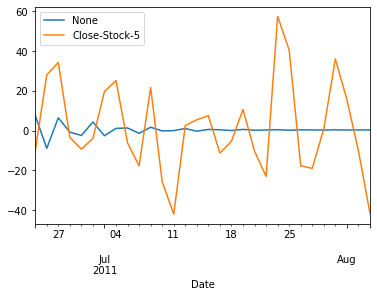

In [29]:
pred.plot(legend = True)
test_model['Close-Stock-5'].plot(legend = True)

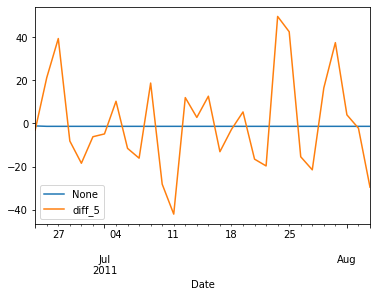

In [30]:
pred_1.plot(legend = True)
test_model['diff_5'].plot(legend = True)

In [31]:
test_model['Close-Stock-5'].mean()

1.55

In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test_model['Close-Stock-5'].mean()
rmse=sqrt(mean_squared_error(pred,test_model['Close-Stock-5']))
print(rmse)

23.60007862270115


In [33]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test_model['diff_5'].mean()
rmse=sqrt(mean_squared_error(pred_1,test_model['diff_5']))
print(rmse)

22.145105492267806


In [34]:
test_op = pd.read_csv("new_test.csv",index_col = 'Date', parse_dates = True)
y =model_1.predict(start=1,end= 97)
output = pd.DataFrame(y)
output.to_csv('Stock5.csv', index=False)